In [4]:
import json

# Assuming your JSON data is stored in a file named 'data.json'
file_path = 'pred_conll04.json'

# Initialize an empty set to store unique relation types
unique_relations = set()

# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

    # Iterate through each item in the data
    for item in data:
        # Iterate through each triple in the item's "triples" list
        for triple in item["triples"]:
            # Add the "type" of each triple to the set
            unique_relations.add(triple["type"])

# The length of the set represents the number of unique relation types
print(f"Number of unique relations: {len(unique_relations)}")

TypeError: string indices must be integers

In [10]:
unique_relations

{'applies to jurisdiction',
 'author',
 'based on',
 'candidacy in election',
 'candidate',
 'capital',
 'capital of',
 'chairperson',
 'contains administrative territorial entity',
 'country',
 'country of citizenship',
 'date of birth',
 'date of death',
 'derivative work',
 'diplomatic relation',
 'educated at',
 'employer',
 'ethnic group',
 'facet of',
 'field of work',
 'founded by',
 'has part',
 'head of government',
 'headquarters location',
 'inception',
 'instance of',
 'language of work or name',
 'language used',
 'legislative body',
 'located in or next to body of water',
 'located in the administrative territorial entity',
 'location',
 'main subject',
 'member of',
 'member of political party',
 'military branch',
 'mouth of the watercourse',
 'notable work',
 'number of participants',
 'occupant',
 'occupation',
 'office held by head of government',
 'officeholder',
 'operator',
 'owned by',
 'owner of',
 'parent organization',
 'part of',
 'participant',
 'participant

In [18]:
relations = {'applies to jurisdiction',
 'author',
 'based on',
 'candidacy in election',
 'candidate',
 'capital',
 'capital of',
 'chairperson',
 'contains administrative territorial entity',
 'country',
 'country of citizenship',
 'date of birth',
 'date of death',
 'derivative work',
 'diplomatic relation',
 'educated at',
 'employer',
 'ethnic group',
 'facet of',
 'field of work',
 'founded by',
 'has part',
 'head of government',
 'headquarters location',
 'inception',
 'instance of',
 'language of work or name',
 'language used',
 'legislative body',
 'located in or next to body of water',
 'located in the administrative territorial entity',
 'location',
 'main subject',
 'member of',
 'member of political party',
 'military branch',
 'mouth of the watercourse',
 'notable work',
 'number of participants',
 'occupant',
 'occupation',
 'office held by head of government',
 'officeholder',
 'operator',
 'owned by',
 'owner of',
 'parent organization',
 'part of',
 'participant',
 'participant in',
 'performer',
 'place of birth',
 'place of death',
 'place of publication',
 'point in time',
 'position held',
 'product or material produced',
 'relative',
 'residence',
 'shares border with',
 'significant event',
 'spouse',
 'subsidiary',
 'tributary',
 'twinned administrative body',
 'used by',
 'uses',
 'work location'}

In [25]:
import json

# Load the prediction and truth JSON files
with open('/Users/ananyahooda/Desktop/final/pred_conll04_extracted_from_rebel.json', 'r') as f:
    pred_data = json.load(f)

with open('/Users/ananyahooda/Desktop/final/data/extracted_data/conll04/test_triples.json', 'r') as f:
    truth_data = json.load(f)

# Assuming pred_data and truth_data are lists of dictionaries, we need to find the correct dictionary by 'id'
if not isinstance(pred_data, list) or not isinstance(truth_data, list):
    raise ValueError("JSON data should be a list of dictionaries.")

In [26]:
for pred_item in pred_data:
    print(pred_item['triples'])
    

[{'head': 'Lennon', 'type': 'place of death', 'tail': 'Lennon'}]
[{'head': 'Valparaiso', 'type': 'country', 'tail': 'Chile'}]
[{'head': 'Shoshone', 'type': 'located in the administrative territorial entity', 'tail': 'Idaho'}, {'head': 'Bannock', 'type': 'located in the administrative territorial entity', 'tail': 'Idaho'}]
[{'head': 'Maryland', 'type': 'legislative body', 'tail': 'House of Delegates'}, {'head': 'House of Delegates', 'type': 'applies to jurisdiction', 'tail': 'Maryland'}]
[{'head': 'Miguel Rodriguez Mendoza', 'type': 'country of citizenship', 'tail': 'Venezuela'}]
[{'head': 'Bruce Springsteen', 'type': 'place of birth', 'tail': 'New Jersey'}]
[{'head': 'Moscow', 'type': 'twinned administrative body', 'tail': 'Leningrad'}, {'head': 'Bolshoi Ballet', 'type': 'location', 'tail': 'Moscow'}, {'head': 'Bolshoi Ballet', 'type': 'location', 'tail': 'Moscow'}, {'head': 'Moscow', 'type': 'twinned administrative body', 'tail': 'Leningrad'}, {'head': 'Leningrad', 'type': 'twinned ad

In [27]:


# Extract unique relation types from the prediction data
# Initialize a dictionary to hold the mapping of relations

relation_mapping = {relation: {'employer':0, 'headquarters location':0, 'killed by':0, 'location':0, 'residence':0, 'no_relation': 0} for relation in relations}


# Function to find a match for a predicted triple in the truth triples
def find_truth_match(pred_triple, truth_triples):
    for truth_triple in truth_triples:
        if pred_triple['head'] == truth_triple['head'] and pred_triple['tail'] == truth_triple['tail']:
            return truth_triple['type']
    return 'no_relation'

# Iterate over all items in the prediction data
for pred_item in pred_data:
    # Find the corresponding truth item by 'id'
    truth_item = next((item for item in truth_data if item['id'] == pred_item['id']), None)
    if truth_item is not None:
        # Iterate over the predicted triples and update the relation mapping counts
        for pred_triple in pred_item['triples']:
            truth_match = find_truth_match(pred_triple, truth_item['triples'])
            if truth_match in relation_mapping[pred_triple['type']]:
                relation_mapping[pred_triple['type']][truth_match] += 1
            else:
                relation_mapping[pred_triple['type']]['no_relation'] += 1

# Calculate the confidence scores
for relation, mapping in relation_mapping.items():
    total = sum(mapping.values())
    for key in mapping:
        mapping[key] = mapping[key] / total if total > 0 else 0

# Output the final dictionary with confidence scores
print(json.dumps(relation_mapping, indent=2))

{
  "headquarters location": {
    "employer": 0.0,
    "headquarters location": 0.5263157894736842,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 0.47368421052631576
  },
  "owned by": {
    "employer": 0.0,
    "headquarters location": 0.2,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 0.8
  },
  "main subject": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "has part": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "country of citizenship": {
    "employer": 0.4,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.4,
    "no_relation": 0.2
  },
  "founded by": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,


In [10]:
import json

# Load the prediction and truth JSON files
with open('pred_conll04.json', 'r') as f:
    pred_data = json.load(f)

with open('/Users/ananyahooda/Desktop/final/data/extracted_data/conll04/test_triples.json', 'r') as f:
    truth_data = json.load(f)


# Initialize a dictionary to hold the mapping of relations

# Function to find a match for a predicted triple in the truth triples
def find_truth_match(pred_triple, truth_triples):
    for truth_triple in truth_triples:
        if pred_triple['head'] == truth_triple['head'] and pred_triple['tail'] == truth_triple['tail']:
            return truth_triple['type']
    return 'no_relation'

# Iterate over the predicted triples and update the relation mapping counts
for pred_triple in pred_data['triples']:
    truth_match = find_truth_match(pred_triple, truth_data['triples'])
    relation_mapping[pred_triple['type']][truth_match] += 1

# Calculate the confidence scores
for relation, mapping in relation_mapping.items():
    total = sum(mapping.values())
    for key in mapping:
        if total > 0:
            mapping[key] = mapping[key] / total

# Output the final dictionary with confidence scores
print(json.dumps(relation_mapping, indent=2))


TypeError: list indices must be integers or slices, not str

In [13]:
from collections import defaultdict
import json

def map_relations(pred_file, truth_file):
    pred_data = json.load(pred_file)
    truth_data = json.load(truth_file)
    
    id_to_truth_relations = {}
    for truth_entry in truth_data:
        id_to_truth_relations[truth_entry['id']] = {triplet['head'] + " | " + triplet['tail']: triplet['type'] for triplet in truth_entry['triples']}
    
    relation_confidence = defaultdict(lambda: defaultdict(int))
    for pred_entry in pred_data:
        id_ = pred_entry['id']
        if id_ in id_to_truth_relations:
            truth_relations = id_to_truth_relations[id_]
            for pred_triplet in pred_entry['triples']:
                key = pred_triplet['head'] + " | " + pred_triplet['tail']
                if key in truth_relations:
                    truth_relation = truth_relations[key]
                    pred_relation = pred_triplet['type']
                    relation_confidence[pred_relation][truth_relation] += 1
    
    # Normalize confidence scores
    for pred_relation, truth_relations in relation_confidence.items():
        total_count = sum(truth_relations.values())
        for truth_relation in truth_relations:
            relation_confidence[pred_relation][truth_relation] /= total_count
    
    return relation_confidence

# Example usage



In [14]:
pred_file = 'pred_conll04.json'
truth_file = '/Users/ananyahooda/Desktop/final/data/extracted_data/conll04/test_triples.json'
confidence_scores = map_relations(pred_file, truth_file)
print(confidence_scores)

AttributeError: 'str' object has no attribute 'read'

In [3]:
import json

# Assuming your JSON data is stored in a file named 'data.json'

file_path = '/Users/ananyahooda/Desktop/final/data/extracted_data/conll04/test_triples.json'
# Initialize an empty set to store unique relation types
unique_relations = set()

# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

    # Iterate through each item in the data
    for item in data:
        # Iterate through each triple in the item's "triples" list
        for triple in item["triples"]:
            # Add the "type" of each triple to the set
            unique_relations.add(triple["type"])

# The length of the set represents the number of unique relation types
print(f"Number of unique relations: {len(unique_relations)}")


Number of unique relations: 5


In [4]:
unique_relations

{'employer', 'headquarters location', 'killed by', 'location', 'residence'}

In [35]:
from semantic_text_similarity.models import WebBertSimilarity




# Instantiate the model for general web text
web_model = WebBertSimilarity(device='cpu', batch_size=10)

# Your sets of relations
  # Replace with your list of 68 relations



# similarity_dict now contains the relations from the large set sorted by their semantic similarity to each relation in the small set

# similarity_dict now contains the relations from the large set sorted by their semantic similarity to each relation in the small set


100%|██████████| 405359924/405359924 [07:18<00:00, 923929.02B/s]


In [37]:
large_set =  ['applies to jurisdiction',
 'author',
 'based on',
 'candidacy in election',
 'candidate',
 'capital',
 'capital of',
 'chairperson',
 'contains administrative territorial entity',
 'country',
 'country of citizenship',
 'date of birth',
 'date of death',
 'derivative work',
 'diplomatic relation',
 'educated at',
 'employer',
 'ethnic group',
 'facet of',
 'field of work',
 'founded by',
 'has part',
 'head of government',
 'headquarters location',
 'inception',
 'instance of',
 'language of work or name',
 'language used',
 'legislative body',
 'located in or next to body of water',
 'located in the administrative territorial entity',
 'location',
 'main subject',
 'member of',
 'member of political party',
 'military branch',
 'mouth of the watercourse',
 'notable work',
 'number of participants',
 'occupant',
 'occupation',
 'office held by head of government',
 'officeholder',
 'operator',
 'owned by',
 'owner of',
 'parent organization',
 'part of',
 'participant',
 'participant in',
 'performer',
 'place of birth',
 'place of death',
 'place of publication',
 'point in time',
 'position held',
 'product or material produced',
 'relative',
 'residence',
 'shares border with',
 'significant event',
 'spouse',
 'subsidiary',
 'tributary',
 'twinned administrative body',
 'used by',
 'uses',
 'work location']

In [38]:
small_set = ['employer', 'headquarters location', 'killed by', 'location', 'residence']

# Initialize a dictionary to hold the results
similarity_dict = {key: None for key in small_set}
relation_to_key_similarity = {relation: (None, 0) for relation in large_set}

# Calculate similarity for each relation in the large set against all in the small set
for large_relation in large_set:
    for small_relation in small_set:
        # Calculate the similarity score between the large relation and the small relation
        similarity_score = web_model.predict([(large_relation, small_relation)])[0]
        
        # If this score is higher than the previous score for this large relation, update it
        if similarity_score > relation_to_key_similarity[large_relation][1]:
            relation_to_key_similarity[large_relation] = (small_relation, similarity_score)

# Assign each relation from the large set to the key with which it has the highest similarity
for relation, (key, _) in relation_to_key_similarity.items():
    if similarity_dict[key] is None:
        similarity_dict[key] = [relation]
    else:
        similarity_dict[key].append(relation)

# Print the resulting dictionary
print(similarity_dict)

{'employer': ['derivative work', 'employer', 'field of work', 'language of work or name', 'occupation', 'officeholder', 'operator', 'position held', 'product or material produced', 'subsidiary', 'work location'], 'headquarters location': ['contains administrative territorial entity', 'headquarters location', 'located in the administrative territorial entity', 'military branch', 'parent organization'], 'killed by': ['date of death', 'place of death'], 'location': ['located in or next to body of water', 'location', 'mouth of the watercourse', 'point in time', 'shares border with', 'tributary'], 'residence': ['applies to jurisdiction', 'author', 'based on', 'candidacy in election', 'candidate', 'capital', 'capital of', 'chairperson', 'country', 'country of citizenship', 'date of birth', 'diplomatic relation', 'educated at', 'ethnic group', 'facet of', 'founded by', 'has part', 'head of government', 'inception', 'instance of', 'language used', 'legislative body', 'main subject', 'member of

In [39]:
total_length = sum(len(value) for value in similarity_dict.values())

print(total_length)

68


In [36]:
similarity_dict 

{'employer': ['employer',
  'work location',
  'occupation',
  'residence',
  'spouse',
  'language of work or name',
  'field of work',
  'position held',
  'owner of',
  'twinned administrative body',
  'occupant',
  'inception',
  'chairperson',
  'subsidiary',
  'officeholder',
  'operator',
  'instance of',
  'contains administrative territorial entity',
  'founded by',
  'located in the administrative territorial entity',
  'product or material produced',
  'date of death',
  'owned by',
  'part of',
  'relative',
  'notable work',
  'head of government',
  'uses',
  'headquarters location',
  'based on',
  'capital',
  'has part',
  'military branch',
  'facet of',
  'member of',
  'participant',
  'candidate',
  'location',
  'parent organization',
  'date of birth',
  'office held by head of government',
  'applies to jurisdiction',
  'used by',
  'place of death',
  'country of citizenship',
  'tributary',
  'performer',
  'derivative work',
  'place of publication',
  'capit

In [14]:
mapping = {
    'employer': [
        'author',
        'based on',
        'candidacy in election',
        'candidate',
        'position held',
        'derivative work'
        'relative'
        'chairperson',
        'country of citizenship',
        'diplomatic relation',
        'educated at',
        'employer',
        'ethnic group',
        'product or material produced',
        'facet of',
        'field of work',
        'founded by',
        'has part',
        'head of government',
        'inception',
        'instance of',
        'language of work or name',
        'language used',
        'legislative body',
        'main subject',
        'member of',
        'member of political party',
        'military branch',
        'notable work',
        'number of participants',
        'occupant',
        'occupation',
        'office held by head of government',
        'officeholder',
        'operator',
        'owned by',
        'owner of',
        'parent organization',
        'part of',
        'participant',
        'participant in',
        'performer',
        'point in time',
        'significant event',
        'spouse',
        'subsidiary',
        'used by',
        'uses'
    ],
    'headquarters location': [
        'applies to jurisdiction'
        'contains administrative territorial entity',
        'headquarters location',
        'located in the administrative territorial entity',
        'location',
        'work location',
          'twinned administrative body',
    ],
    'killed by': [
        'date of death'
    ],
    'location': [
        'capital',
        'capital of',
        'contains administrative territorial entity',
        'country',
        'date of birth',
        'located in or next to body of water',
        'location',
        'mouth of the watercourse',
        'place of birth',
        'place of death',
        'place of publication',
        'shares border with',
        'tributary'
    ],
    'residence': [
        'residence'
    ]
}


In [7]:
unique_values = set()
for values in mapping.values():
    unique_values.update(values)

num_unique_values = len(unique_values)
print("Number of unique values:", num_unique_values)

Number of unique values: 64


In [8]:
unique_values

{'applies to jurisdiction',
 'author',
 'based on',
 'candidacy in election',
 'candidate',
 'capital',
 'capital of',
 'chairperson',
 'contains administrative territorial entity',
 'country',
 'country of citizenship',
 'date of birth',
 'date of death',
 'diplomatic relation',
 'educated at',
 'employer',
 'ethnic group',
 'facet of',
 'field of work',
 'founded by',
 'has part',
 'head of government',
 'headquarters location',
 'inception',
 'instance of',
 'language of work or name',
 'language used',
 'legislative body',
 'located in or next to body of water',
 'located in the administrative territorial entity',
 'location',
 'main subject',
 'member of',
 'member of political party',
 'military branch',
 'mouth of the watercourse',
 'notable work',
 'number of participants',
 'occupant',
 'occupation',
 'office held by head of government',
 'officeholder',
 'operator',
 'owned by',
 'owner of',
 'parent organization',
 'part of',
 'participant',
 'participant in',
 'performer',


In [11]:
unique_relations - unique_values

{'derivative work',
 'position held',
 'product or material produced',
 'relative'}

## True_golden_truth_generation
## compare test triples (from the extraction script) and rebel_predcomparablee file
converting pred_conll04 (from the rebel triple extraction)to comparable format

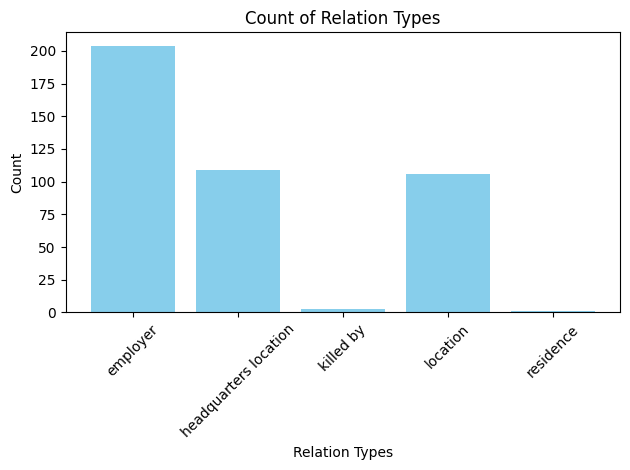

In [1]:
import json
import matplotlib.pyplot as plt

# Read the JSON file
with open('rebelpred_conll04comparable.json', 'r') as f:
    data = json.load(f)

# Extract relation types and count occurrences
relation_counts = {}
for entry in data:
    for triple in entry['triples']:
        relation_type = triple['type']
        relation_counts[relation_type] = relation_counts.get(relation_type, 0) + 1

# Assuming you have only 5 relation types
# If there could be more types, you might need to modify this
relation_types = ['employer', 'headquarters location', 'killed by', 'location', 'residence']

# Initialize counts for each relation type
counts = [relation_counts.get(rel_type, 0) for rel_type in relation_types]

# Plotting
plt.bar(relation_types, counts, color='skyblue')
plt.xlabel('Relation Types')
plt.ylabel('Count')
plt.title('Count of Relation Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [29]:
data = {
  "headquarters location": {
    "employer": 0.0,
    "headquarters location": 0.5263157894736842,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 0.47368421052631576
  },
  "owned by": {
    "employer": 0.0,
    "headquarters location": 0.2,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 0.8
  },
  "main subject": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "has part": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "country of citizenship": {
    "employer": 0.4,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.4,
    "no_relation": 0.2
  },
  "founded by": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "mouth of the watercourse": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "member of political party": {
    "employer": 0.3333333333333333,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 0.6666666666666666
  },
  "capital of": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 1.0,
    "residence": 0.0,
    "no_relation": 0.0
  },
  "participant in": {
    "employer": 0.2,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 0.8
  },
  "location": {
    "employer": 0.0,
    "headquarters location": 0.6666666666666666,
    "killed by": 0.0,
    "location": 0.3333333333333333,
    "residence": 0.0,
    "no_relation": 0.0
  },
  "shares border with": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "candidate": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "product or material produced": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "tributary": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "subsidiary": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "point in time": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "employer": {
    "employer": 0.6153846153846154,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 0.38461538461538464
  },
  "diplomatic relation": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "educated at": {
    "employer": 0.5,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 0.5
  },
  "language of work or name": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "occupation": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "relative": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "legislative body": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "derivative work": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "field of work": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "capital": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "located in the administrative territorial entity": {
    "employer": 0.0,
    "headquarters location": 0.17647058823529413,
    "killed by": 0.0,
    "location": 0.29411764705882354,
    "residence": 0.0,
    "no_relation": 0.5294117647058824
  },
  "residence": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "number of participants": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "date of death": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "significant event": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "chairperson": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "part of": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.1,
    "residence": 0.0,
    "no_relation": 0.9
  },
  "date of birth": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "operator": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "ethnic group": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "place of death": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "occupant": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "parent organization": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "work location": {
    "employer": 0.5,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.5,
    "no_relation": 0.0
  },
  "office held by head of government": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "inception": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "member of": {
    "employer": 0.3333333333333333,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 0.6666666666666666
  },
  "contains administrative territorial entity": {
    "employer": 0.0,
    "headquarters location": 0.058823529411764705,
    "killed by": 0.0,
    "location": 0.058823529411764705,
    "residence": 0.0,
    "no_relation": 0.8823529411764706
  },
  "candidacy in election": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "position held": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "performer": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "used by": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "facet of": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "participant": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "officeholder": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "twinned administrative body": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "author": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "based on": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "language used": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "located in or next to body of water": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "owner of": {
    "employer": 0.5,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 0.5
  },
  "head of government": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "instance of": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "applies to jurisdiction": {
    "employer": 0.0,
    "headquarters location": 0.3333333333333333,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 0.6666666666666666
  },
  "place of birth": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.3225806451612903,
    "no_relation": 0.6774193548387096
  },
  "notable work": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "military branch": {
    "employer": 0.5,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 0.5
  },
  "spouse": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "uses": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  },
  "country": {
    "employer": 0.0,
    "headquarters location": 0.09375,
    "killed by": 0.0,
    "location": 0.28125,
    "residence": 0.0,
    "no_relation": 0.625
  },
  "place of publication": {
    "employer": 0.0,
    "headquarters location": 0.0,
    "killed by": 0.0,
    "location": 0.0,
    "residence": 0.0,
    "no_relation": 1.0
  }
}

In [30]:
relation_mapping = {
    "employer": [],
    "headquarters location": [],
    "killed by": [],
    "location": [],
    "residence": [],
    "no_relation": []
}

In [31]:
for pred_relation, scores in data.items():
    # Find the relation with the highest confidence score
    max_relation = max(scores, key=scores.get)
    # Map the predicted relation to the relation with the highest score
    relation_mapping[max_relation].append(pred_relation)

# Output the final mapping
print(json.dumps(relation_mapping, indent=2))

{
  "employer": [
    "country of citizenship",
    "employer",
    "educated at",
    "work location",
    "owner of",
    "military branch"
  ],
  "headquarters location": [
    "headquarters location",
    "location"
  ],
  "killed by": [],
  "location": [
    "capital of"
  ],
  "residence": [],
  "no_relation": [
    "owned by",
    "main subject",
    "has part",
    "founded by",
    "mouth of the watercourse",
    "member of political party",
    "participant in",
    "shares border with",
    "candidate",
    "product or material produced",
    "tributary",
    "subsidiary",
    "point in time",
    "diplomatic relation",
    "language of work or name",
    "occupation",
    "relative",
    "legislative body",
    "derivative work",
    "field of work",
    "capital",
    "located in the administrative territorial entity",
    "residence",
    "number of participants",
    "date of death",
    "significant event",
    "chairperson",
    "part of",
    "date of birth",
    "ope

In [32]:
relation_mapping

{'employer': ['country of citizenship',
  'employer',
  'educated at',
  'work location',
  'owner of',
  'military branch'],
 'headquarters location': ['headquarters location', 'location'],
 'killed by': [],
 'location': ['capital of'],
 'residence': [],
 'no_relation': ['owned by',
  'main subject',
  'has part',
  'founded by',
  'mouth of the watercourse',
  'member of political party',
  'participant in',
  'shares border with',
  'candidate',
  'product or material produced',
  'tributary',
  'subsidiary',
  'point in time',
  'diplomatic relation',
  'language of work or name',
  'occupation',
  'relative',
  'legislative body',
  'derivative work',
  'field of work',
  'capital',
  'located in the administrative territorial entity',
  'residence',
  'number of participants',
  'date of death',
  'significant event',
  'chairperson',
  'part of',
  'date of birth',
  'operator',
  'ethnic group',
  'place of death',
  'occupant',
  'parent organization',
  'office held by head o

In [ ]:
relation_mappings = {'employer': 
['country of citizenship',
  'employer',
  'educated at',
  'work location',
  'owner of',
  'military branch'],
 'headquarters location': 
 ['headquarters location', 'location'],
 'killed by': [],
 'location': ['capital of'],
 'residence': [],
 Hello hello hello
 'no_relation': 
 ['owned by',
  'main subject',
  'has part',
  'founded by',
  'mouth of the watercourse',
  'member of political party',
  'participant in',
  'shares border with',
  'candidate',
  'product or material produced',
  'tributary',
  'subsidiary',
  'point in time',
  'diplomatic relation',
  'language of work or name',
  'occupation',
  'relative',
  'legislative body',
  'derivative work',
  'field of work',
  'capital',
  'located in the administrative territorial entity',
  'residence',
  'number of participants',
  'date of death',
  'significant event',
  'chairperson',
  'part of',
  'date of birth',
  'operator',
  'ethnic group',
  'place of death',
  'occupant',
  'parent organization',
  'office held by head of government',
  'inception',
  'member of',
  'contains administrative territorial entity',
  'candidacy in election',
  'position held',
  'performer',
  'used by',
  'facet of',
  'participant',
  'officeholder',
  'twinned administrative body',
  'author',
  'based on',
  'language used',
  'located in or next to body of water',
  'head of government',
  'instance of',
  'applies to jurisdiction',
  'place of birth',
  'notable work',
  'spouse',
  'uses',
  'country',
  'place of publication']}

In [ ]:
import json

# Load data from JSON file
with open('your_data.json', 'r') as file:
    data = json.load(file)

# Generate new JSON objects with updated types
new_data = []
for obj in data:
    new_obj = {
        "title": obj["title"],
        "context": obj["context"],
        "id": obj["id"],
        "triples": []
    }
    for triple in obj["triples"]:
        for key, value in mappings.items():
            if triple["type"] in value:
                triple["type"] = key
                break
        new_obj["triples"].append(triple)
    new_data.append(new_obj)

# Write new JSON objects to a new file
with open("new_data.json", "w") as outfile:
    json.dump(new_data, outfile, indent=4)

print("New file 'new_data.json' created with updated types.")


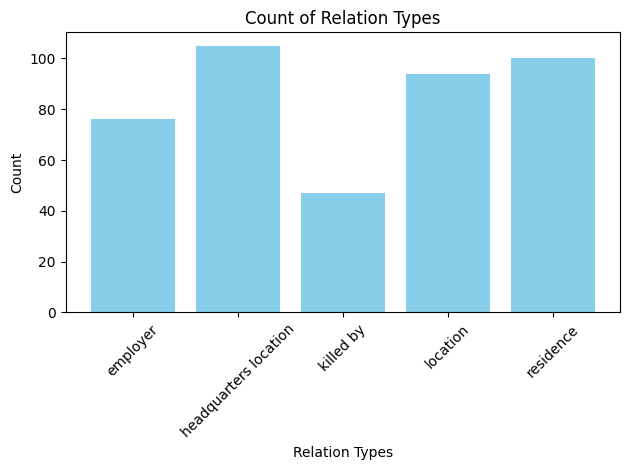

In [2]:
import json
import matplotlib.pyplot as plt

# Read the JSON file
with open('/Users/ananyahooda/Desktop/final/data/extracted_data/conll04/test_triples.json', 'r') as f:
    data = json.load(f)

# Extract relation types and count occurrences
relation_counts = {}
for entry in data:
    for triple in entry['triples']:
        relation_type = triple['type']
        relation_counts[relation_type] = relation_counts.get(relation_type, 0) + 1

# Assuming you have only 5 relation types
# If there could be more types, you might need to modify this
relation_types = ['employer', 'headquarters location', 'killed by', 'location', 'residence']

# Initialize counts for each relation type
counts = [relation_counts.get(rel_type, 0) for rel_type in relation_types]

# Plotting
plt.bar(relation_types, counts, color='skyblue')
plt.xlabel('Relation Types')
plt.ylabel('Count')
plt.title('Count of Relation Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

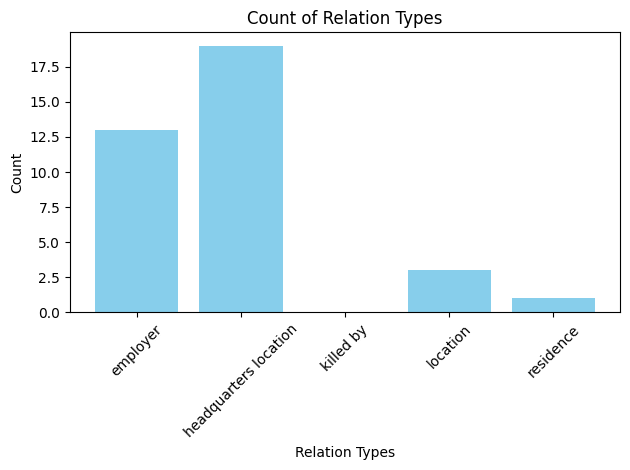

In [3]:
import json
import matplotlib.pyplot as plt

# Read the JSON file
with open('pred_conll04_Mistral.json', 'r') as f:
    data = json.load(f)

# Extract relation types and count occurrences
relation_counts = {}
for entry in data:
    for triple in entry['triples']:
        relation_type = triple['type']
        relation_counts[relation_type] = relation_counts.get(relation_type, 0) + 1

# Assuming you have only 5 relation types
# If there could be more types, you might need to modify this
relation_types = ['employer', 'headquarters location', 'killed by', 'location', 'residence']

# Initialize counts for each relation type
counts = [relation_counts.get(rel_type, 0) for rel_type in relation_types]

# Plotting
plt.bar(relation_types, counts, color='skyblue')
plt.xlabel('Relation Types')
plt.ylabel('Count')
plt.title('Count of Relation Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [19]:
with open('pred_conll04.json', 'r') as file:
    data = json.load(file)

In [20]:
new_data = []
for obj in data:
    new_obj = {
        "title": obj["title"],
        "context": obj["context"],
        "id": obj["id"],
        "triples": []
    }
    for triple in obj["triples"]:
        for key, value in mapping.items():
            if triple["type"] in value:
                triple["type"] = key
                break
        new_obj["triples"].append(triple)
    new_data.append(new_obj)

# Write new JSON objects to a new file
with open("rebelpred_conll04comparable.json", "w") as outfile:
    json.dump(new_data, outfile, indent=4)

print("New file 'new_data.json' created with updated types.")

New file 'new_data.json' created with updated types.


In [22]:
import json

# Function to calculate precision, recall, and F1 score
def calculate_scores(tp, total_golden, total_prediction):
    precision = tp / total_prediction if total_prediction > 0 else 0
    recall = tp / total_golden if total_golden > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1

# Function to process the files and calculate the scores, considering extras
def evaluate_predictions_corrected(golden_file, prediction_file):
    # Load the golden truths and predictions
    with open(golden_file, 'r') as f:
        golden_data = json.load(f)
    with open(prediction_file, 'r') as f:
        prediction_data = json.load(f)

    tp = 0
    extras = 0

    # Convert golden data and prediction data into dictionaries for easier access
    golden_dict = {item['id']: set(tuple(triple.items()) for triple in item['triples']) for item in golden_data}
    prediction_dict = {item['id']: set(tuple(triple.items()) for triple in item['triples']) for item in prediction_data}

    # Iterate over each instance in the golden data to calculate true positives
    for id, golden_triples in golden_dict.items():
        prediction_triples = prediction_dict.get(id, set())
        tp += len(golden_triples & prediction_triples)

    # Calculate extras in prediction
    for id, prediction_triples in prediction_dict.items():
        if id not in golden_dict:
            extras += len(prediction_triples)
        else:
            unmatched_triples = prediction_triples - golden_dict[id]
            print(unmatched_triples)
            extras += len(unmatched_triples)

    # Calculate micro scores
    total_golden = sum(len(triples) for triples in golden_dict.values())
    total_prediction = sum(len(triples) for triples in prediction_dict.values())
    precision_micro, recall_micro, f1_micro = calculate_scores(tp, total_golden, total_prediction)

    # Calculate macro scores
    total_items = len(golden_dict)
    precision_macro, recall_macro, f1_macro = 0, 0, 0
    for id, golden_triples in golden_dict.items():
        prediction_triples = prediction_dict.get(id, set())
        tp = len(golden_triples & prediction_triples)
        precision, recall, _ = calculate_scores(tp, len(golden_triples), len(prediction_triples))
        precision_macro += precision
        recall_macro += recall
    precision_macro /= total_items
    recall_macro /= total_items
    f1_macro = 2 * (precision_macro * recall_macro) / (precision_macro + recall_macro) if (precision_macro + recall_macro) > 0 else 0

    return {
        'micro': {
            'precision': precision_micro,
            'recall': recall_micro,
            'f1': f1_micro
        },
        'macro': {
            'precision': precision_macro,
            'recall': recall_macro,
            'f1': f1_macro
        },
        'true_positives': tp,
        'extras': extras
    }

In [25]:
scores = evaluate_predictions_corrected('/Users/ananyahooda/Desktop/final/data/extracted_data/conll04/test_triples.json', 'rebelpred_conll04comparable.json')
print("Micro Scores:", scores['micro'])
print("Macro Scores:", scores['macro'])
#print(scores['extras'])

{(('head', 'Cecil Andrus'), ('type', 'employer'), ('tail', 'Idaho Gov.'))}
set()
{(('head', 'Talkabout'), ('type', 'employer'), ('tail', 'XBT Telecom'))}
{(('head', 'AP'), ('type', 'location'), ('tail', 'New Orleans'))}
{(('head', 'Lima'), ('type', 'employer'), ('tail', 'Spanish'))}
{(('head', "Yasir 'Arafat"), ('type', 'employer'), ('tail', 'PLO Chairman'))}
{(('head', 'Jesse Owens'), ('type', 'location'), ('tail', 'Danville, Ala.'))}
{(('head', 'Will Rogers'), ('type', 'location'), ('tail', 'Oklahoma'))}
{(('head', 'Jesse Jackson'), ('type', 'location'), ('tail', 'South Carolina'))}
{(('head', 'assassination'), ('type', 'employer'), ('tail', 'Martin Luther King')), (('head', 'Martin Luther King'), ('type', 'employer'), ('tail', 'assassination'))}
{(('head', 'Sirhan B. Sirhan'), ('type', 'employer'), ('tail', '22 years ago')), (('head', '22 years ago'), ('type', 'employer'), ('tail', 'Sirhan B. Sirhan'))}
{(('head', 'Fats Domino'), ('type', 'location'), ('tail', 'New Orleans'))}
{(('h

In [29]:
import json
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support

def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def score(gold_data, pred_data, verbose=False):
    gold_by_id = {item["id"]: item for item in gold_data}
    pred_by_id = {item["id"]: item for item in pred_data}

    gold_triples_by_id = {item["id"]: set((triple["head"], triple["tail"]) for triple in item["triples"]) for item in gold_data}
    pred_triples_by_id = {item["id"]: set((triple["head"], triple["tail"]) for triple in item["triples"]) for item in pred_data}

    # Initialize counters
    correct_by_relation = Counter()
    guessed_by_relation = Counter()
    gold_by_relation = Counter()

    for id in gold_by_id.keys():
        gold_triples = gold_triples_by_id[id]
        pred_triples = pred_triples_by_id[id]

        correct_triples = gold_triples.intersection(pred_triples)
        gold_only_triples = gold_triples - pred_triples
        pred_only_triples = pred_triples - gold_triples

        for triple in correct_triples:
            correct_by_relation[triple] += 1
        for triple in gold_only_triples:
            gold_by_relation[triple] += 1
        for triple in pred_only_triples:
            guessed_by_relation[triple] += 1

    # Compute precision, recall, and F1 scores
    precisions, recalls, f1_scores, _ = precision_recall_fscore_support(
        list(correct_by_relation.keys()),
        [1] * len(correct_by_relation) +
        list(guessed_by_relation.keys()) +
        list(gold_by_relation.keys()),
        labels=list(correct_by_relation.keys()) +
        list(guessed_by_relation.keys()) +
        list(gold_by_relation.keys()),
        average=None,
    )
    
    # Print verbose information
    if verbose:
        print("Per-relation statistics:")
        for relation, precision, recall, f1_score in zip(correct_by_relation.keys(), precisions, recalls, f1_scores):
            print(f"Relation: {relation}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1_score:.2f}")

    # Compute the aggregate scores
    precision_micro = precisions.mean()
    recall_micro = recalls.mean()
    f1_micro = f1_scores.mean()

    # Print the aggregate scores
    if verbose:
        print("Final Score:")
        print("Precision (micro): {:.3f}".format(precision_micro))
        print("   Recall (micro): {:.3f}".format(recall_micro))
        print("       F1 (micro): {:.3f}".format(f1_micro))

    return precision_micro, recall_micro, f1_micro

# Load the gold and prediction data
gold_data = load_json('/Users/ananyahooda/Desktop/final/data/extracted_data/conll04/test_triples.json')
pred_data = load_json('rebelpred_conll04comparable.json')
# gold first then pred

# Compute and print scores



In [30]:
score(gold_data, pred_data, verbose=True)

ValueError: Found input variables with inconsistent numbers of samples: [96, 697]

In [31]:
import json
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support

def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def score(gold_data, pred_data, verbose=False):
    gold_by_id = {item["id"]: item for item in gold_data}
    pred_by_id = {item["id"]: item for item in pred_data}

    # Find common IDs
    common_ids = set(gold_by_id.keys()).intersection(pred_by_id.keys())

    # Initialize counters
    correct_by_relation = Counter()
    guessed_by_relation = Counter()
    gold_by_relation = Counter()

    for id in common_ids:
        gold_triples = set((triple["head"], triple["tail"]) for triple in gold_by_id[id]["triples"])
        pred_triples = set((triple["head"], triple["tail"]) for triple in pred_by_id[id]["triples"])

        correct_triples = gold_triples.intersection(pred_triples)
        gold_only_triples = gold_triples - pred_triples
        pred_only_triples = pred_triples - gold_triples

        for triple in correct_triples:
            correct_by_relation[triple] += 1
        for triple in gold_only_triples:
            gold_by_relation[triple] += 1
        for triple in pred_only_triples:
            guessed_by_relation[triple] += 1

    # Convert sets to lists for sklearn metrics
    y_true = list(correct_by_relation.keys()) + list(gold_by_relation.keys())
    y_pred = [1] * len(correct_by_relation) + [0] * len(gold_by_relation)

    # Compute precision, recall, and F1 scores
    precisions, recalls, f1_scores, _ = precision_recall_fscore_support(
        y_true,
        y_pred,
        labels=[1],
        average='binary'
    )
    
    # Print verbose information
    if verbose:
        print("Per-relation statistics:")
        for relation, precision, recall, f1_score in zip(correct_by_relation.keys(), precisions, recalls, f1_scores):
            print(f"Relation: {relation}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1_score:.2f}")

    # Compute the aggregate scores
    precision_micro = precisions.mean()
    recall_micro = recalls.mean()
    f1_micro = f1_scores.mean()

    # Print the aggregate scores
    if verbose:
        print("Final Score:")
        print("Precision (micro): {:.3f}".format(precision_micro))
        print("   Recall (micro): {:.3f}".format(recall_micro))
        print("       F1 (micro): {:.3f}".format(f1_micro))

    return precision_micro, recall_micro, f1_micro

# Specify the file paths
gold_file = '/Users/ananyahooda/Desktop/final/data/extracted_data/conll04/test_triples.json'
pred_file = 'rebelpred_conll04comparable.json'

# Load JSON data from files
gold_data = load_json(gold_file)
pred_data = load_json(pred_file)

# Compute and print scores
score(gold_data, pred_data, verbose=True)


ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets